In [1]:
# 导入所有需要的库
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("环境准备完成！所有库已成功导入。")

环境准备完成！所有库已成功导入。


In [2]:
# 步骤一：Python基础语法实战
# 任务1：基础数据结构操作
# 创建房屋数据列表
houses = [
    {'price': 500000, 'area': 120, 'bedrooms': 3, 'location': 'downtown'},
    {'price': 350000, 'area': 90, 'bedrooms': 2, 'location': 'suburb'},
    {'price': 750000, 'area': 150, 'bedrooms': 4, 'location': 'downtown'}
]

print("第一个房屋:", houses[0])
print("第一个房屋的价格:", houses[0]['price'])

第一个房屋: {'price': 500000, 'area': 120, 'bedrooms': 3, 'location': 'downtown'}
第一个房屋的价格: 500000


In [3]:
# 步骤一：Python基础语法实战
# 任务2：计算平均房价 - 循环应用
# 使用循环计算平均房价
total_price = 0
for house in houses:
    total_price += house['price']

average_price = total_price / len(houses)
print(f"平均房价: {average_price:.2f} 元")

平均房价: 533333.33 元


In [4]:
# 步骤一：Python基础语法实战
# 任务3：条件筛选房屋 - 条件语句应用
# 筛选市中心且价格低于60万的房屋
affordable_downtown = []
for house in houses:
    if house['location'] == 'downtown' and house['price'] < 600000:
        affordable_downtown.append(house)
print(affordable_downtown)

# 列表推导式（更简洁的写法）
large_houses = [house for house in houses if house['location'] == 'downtown' and house['price'] < 600000 ]
print(large_houses)

[{'price': 500000, 'area': 120, 'bedrooms': 3, 'location': 'downtown'}]
[{'price': 500000, 'area': 120, 'bedrooms': 3, 'location': 'downtown'}]


In [5]:
# 步骤二：Pandas数据处理实战
# 任务1：数据读取与探索
# 读取CSV文件，'data/house_prices.csv'为相对目录表示法
house_data = pd.read_csv('data/house_prices.csv')

# 基础数据探索
print("数据形状:", house_data.shape)
print("\n前5行数据:")
print(house_data.head())
print("\n数据信息:")
print(house_data.info())

数据形状: (96, 10)

前5行数据:
   price  area  bedrooms  bathrooms  location  year_built  condition  \
0  520.0   120         3          2  downtown        2015          4   
1  350.0    90         2          1    suburb        2005          3   
2  750.0   150         4          3  downtown        2018          5   
3  280.0    80         2          1    suburb        2000          2   
4  620.0   140         3          2  downtown        2016          4   

   has_parking  near_school  near_metro  
0            1            1           1  
1            1            0           0  
2            1            1           1  
3            0            1           0  
4            1            1           1  

数据信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        94 non-null     float64
 1   area         96 non-null     int64  
 2   bedrooms 

In [6]:
# 步骤二：Pandas数据处理实战
# 任务2：数据筛选与排序
# 条件筛选
suburb_houses = house_data[house_data['location'] == 'suburb']
print("suburb_houses:", suburb_houses.shape)
affordable_houses = house_data[(house_data['price'] >= 300) & (house_data['price'] <= 500)]
print("affordable_houses:", affordable_houses.shape)

# 数据排序
price_sorted = house_data.sort_values('price', ascending=False)
print("price_sorted:")
print(price_sorted)

suburb_houses: (51, 10)
affordable_houses: (50, 10)
price_sorted:
    price  area  bedrooms  bathrooms    location  year_built  condition  \
53  800.0   168         4          3  waterfront        2021          5   
36  790.0   165         4          3  waterfront        2020          5   
18  780.0   160         4          3    downtown        2020          5   
88  780.0   158         4          3  waterfront        2020          5   
71  770.0   155         4          3    downtown        2020          5   
..    ...   ...       ...        ...         ...         ...        ...   
49  310.0    81         2          1      suburb        2002          2   
32  300.0    78         2          1      suburb        2001          2   
3   280.0    80         2          1      suburb        2000          2   
17    NaN    88         2          1      suburb        2004          2   
25    NaN   170         4          3  waterfront        2021          5   

    has_parking  near_school  nea

In [7]:
# 步骤二：Pandas数据处理实战
# 任务3：数据清洗与处理
# 检查缺失值
print("缺失值统计:")
print(house_data.isnull().sum())

# 处理缺失值并创建副本
clean_data = house_data.dropna().copy()

# 创建新特征
clean_data['price_per_sqm'] = clean_data['price'] / clean_data['area']
print("处理后的数据前5行:")
print(clean_data.head())

# 可选：检查数据类型和形状
print(f"\n数据形状: {clean_data.shape}")
print(f"数据类型: {type(clean_data)}")

缺失值统计:
price          2
area           0
bedrooms       0
bathrooms      0
location       0
year_built     0
condition      0
has_parking    0
near_school    0
near_metro     0
dtype: int64
处理后的数据前5行:
   price  area  bedrooms  bathrooms  location  year_built  condition  \
0  520.0   120         3          2  downtown        2015          4   
1  350.0    90         2          1    suburb        2005          3   
2  750.0   150         4          3  downtown        2018          5   
3  280.0    80         2          1    suburb        2000          2   
4  620.0   140         3          2  downtown        2016          4   

   has_parking  near_school  near_metro  price_per_sqm  
0            1            1           1       4.333333  
1            1            0           0       3.888889  
2            1            1           1       5.000000  
3            0            1           0       3.500000  
4            1            1           1       4.428571  

数据形状: (94, 11)
数据类型: <c

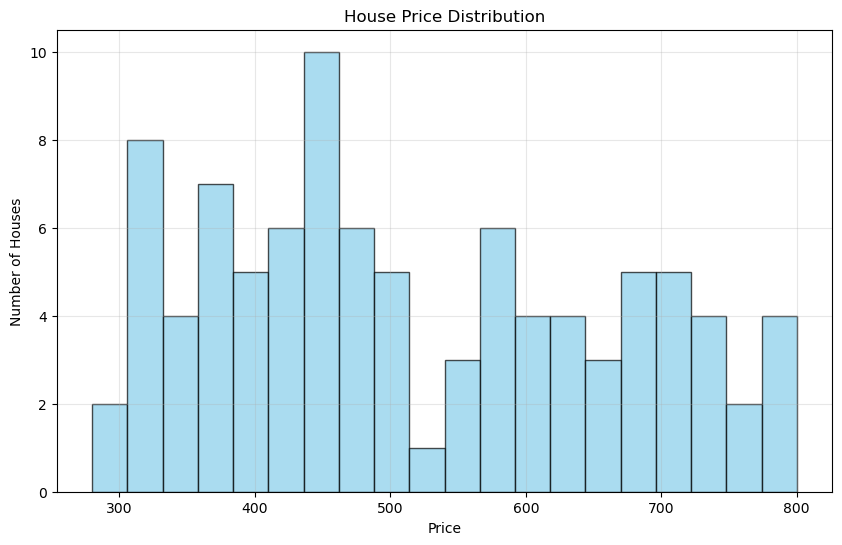

In [8]:
# 步骤三：数据可视化实战
# 任务1：房价分布直方图
import matplotlib.pyplot as plt

# 创建一个新的图形窗口，设置图形尺寸为10英寸宽、6英寸高
plt.figure(figsize=(10, 6))

# 绘制价格数据的直方图
# clean_data['price']: 要绘制的数据列
# bins=20: 将数据分成20个区间（柱子）
# color='skyblue': 设置柱子颜色为天蓝色
# alpha=0.7: 设置透明度为0.7（70%不透明）
# edgecolor='black': 设置柱子边缘颜色为黑色
plt.hist(clean_data['price'], bins=20, color='skyblue', alpha=0.7, edgecolor='black')

# 设置x轴标签为"Price"
plt.xlabel('Price')

# 设置y轴标签为"Number of Houses"
plt.ylabel('Number of Houses')

# 设置图表标题为"House Price Distribution"
plt.title('House Price Distribution')

# 添加网格线
# True: 显示网格
# alpha=0.3: 设置网格线透明度为0.3（30%不透明）
plt.grid(True, alpha=0.3)

# 显示绘制的图表
plt.show()

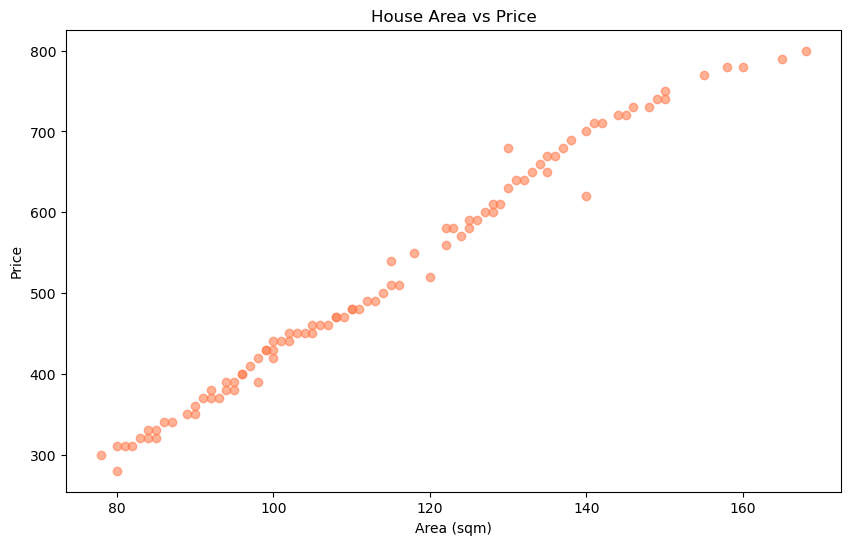

In [9]:
# 步骤三：数据可视化实战
# 任务2：面积与价格关系散点图
# 创建一个新的图形窗口，设置图形尺寸为10英寸宽、6英寸高
plt.figure(figsize=(10, 6))

# 绘制散点图展示面积与价格的关系
# clean_data['area']: x轴数据（房屋面积）
# clean_data['price']: y轴数据（房屋价格）
# alpha=0.6: 设置点的透明度为0.6，使重叠点更易观察
# color='coral': 设置点的颜色为珊瑚色
plt.scatter(clean_data['area'], clean_data['price'], alpha=0.6, color='coral')

# 设置x轴标签为"Area (sqm)"，表示面积（平方米）
plt.xlabel('Area (sqm)')

# 设置y轴标签为"Price"，表示价格
plt.ylabel('Price')

# 设置图表标题为"House Area vs Price"，表示房屋面积与价格关系
plt.title('House Area vs Price')

# 显示绘制的图表
plt.show()

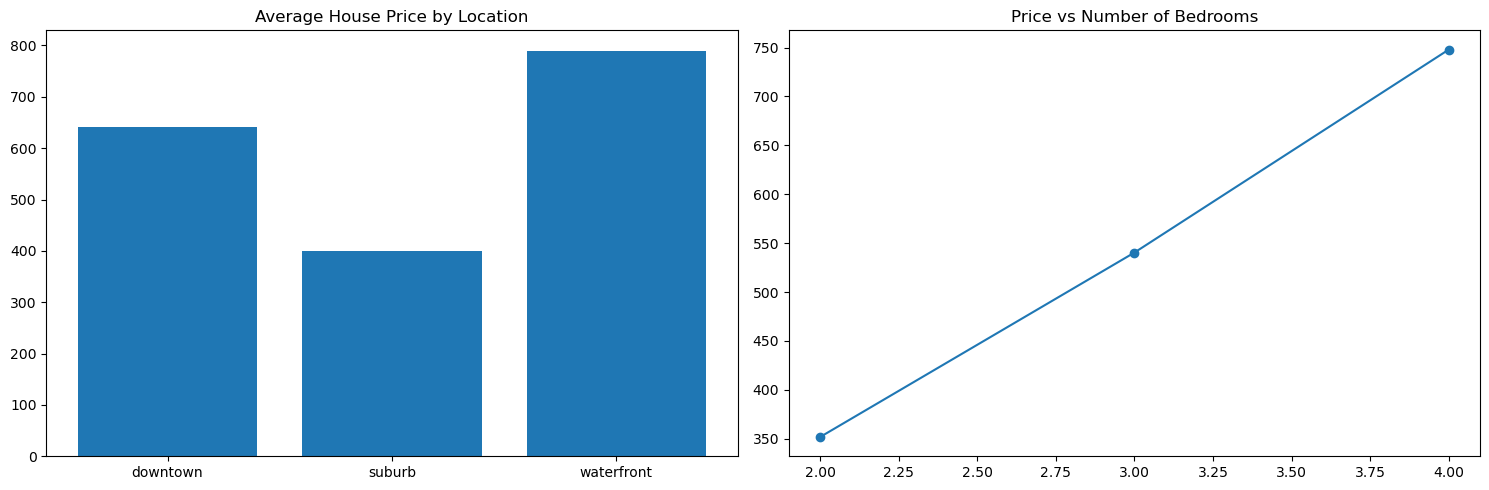

In [11]:
# 步骤三：数据可视化实战
# 任务3：多子图综合展示
# 创建一个包含1行2列子图的图形，设置整个图形尺寸为15英寸宽、5英寸高
# fig: 整个图形对象
# (ax1, ax2): 包含两个子图轴的元组
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 子图1：柱状图 - 展示各地区的平均房价
# 按地区分组并计算每个地区的平均价格
location_avg_price = clean_data.groupby('location')['price'].mean()
# 在第一个子图上绘制柱状图
# location_avg_price.index: x轴数据（地区名称）
# location_avg_price.values: y轴数据（平均价格）
ax1.bar(location_avg_price.index, location_avg_price.values)
# 设置第一个子图的标题为'Average House Price by Location'
ax1.set_title('Average House Price by Location')

# 子图2：折线图 - 展示卧室数量与价格的关系
# 按卧室数量分组并计算每个卧室数量的平均价格
bedroom_price = clean_data.groupby('bedrooms')['price'].mean()
# 在第二个子图上绘制折线图
# bedroom_price.index: x轴数据（卧室数量）
# bedroom_price.values: y轴数据（平均价格）
# marker='o': 在每个数据点处添加圆形标记
ax2.plot(bedroom_price.index, bedroom_price.values, marker='o')
# 设置第二个子图的标题为'Price vs Number of Bedrooms'
ax2.set_title('Price vs Number of Bedrooms')

# 自动调整子图参数，使子图适合图形区域，避免重叠
plt.tight_layout()

# 显示图形
plt.show()

In [12]:
# 生成模拟数据
import pandas as pd
import numpy as np

np.random.seed(42)
data = {
    'student_id': range(1, 101),
    'math_score': np.random.normal(75, 10, 100).astype(int),
    'english_score': np.random.normal(80, 8, 100).astype(int),
    'science_score': np.random.normal(78, 12, 100).astype(int),
    'attendance_rate': np.random.uniform(70, 100, 100),
    'extracurricular': np.random.choice(['艺术', '体育', '学术', '无'], 100)
}

student_df = pd.DataFrame(data)

In [13]:
print(student_df)

    student_id  math_score  english_score  science_score  attendance_rate  \
0            1          79             68             82        78.461037   
1            2          73             76             84        75.323186   
2            3          81             77             90        92.518443   
3            4          90             73             90        94.205042   
4            5          72             78             61        99.715154   
..         ...         ...            ...            ...              ...   
95          96          60             83             69        90.872461   
96          97          77             72             88        83.636232   
97          98          77             81             81        88.826742   
98          99          75             80             87        87.529429   
99         100          72             70             85        97.034740   

   extracurricular  
0               艺术  
1               学术  
2           